## **Vidyuth Sridhar** 

## Data Science & Business Analytics Intern at The Sparks Foundation 

# Task #6 of Data Science: Prediction using Decision Tree Algorithm

Dataset : https://bit.ly/3kXTdox





First, let's import all the necessary libraries:
  
  *   NumPy: For supporting large, multidimentional arrays.
  *   pandas: For data manipulation and analysis.
  *   seaborn: For statistical data visualization.
  *   matplotlib: For plotting graphs.





In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

Now, we will read the given iris dataset

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Next, we will try to get a brief summary of the dataframe we have, that is, column types, sum of null values, column values, shape of dataframe, and number of unique values

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


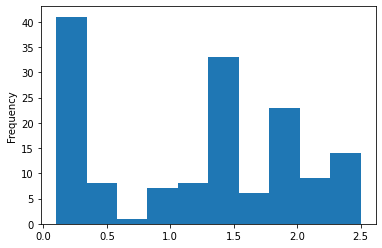

In [ ]:
data['PetalWidthCm'].plot.hist()

We can see that almost 50 flowers in the dataset have a value between 0.1 and 0.5

## **Check The Relationship Between Columns**

To check the relationships we are going to use seaborn.seaborn provides us with a function called pairplot that plot pairwise relationships in a dataset. We can throw the whole dataframe as the parameters so that it will check relationship for each column to other columns. We can also give categorical color based on a certain column. To know whether there are outliers in our data or not we can give hue with Species as the parameter.


In [ ]:
import seaborn as sns

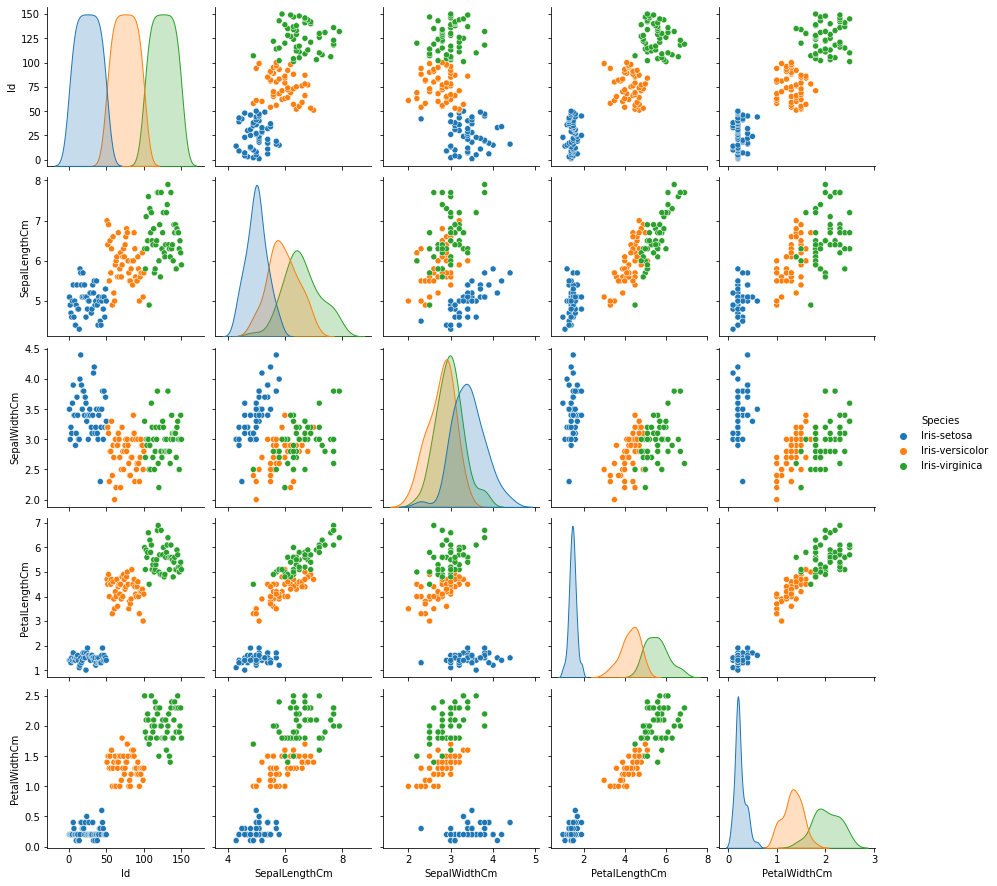

In [ ]:
sns.pairplot(data, hue='Species')

There are some outliers. Those outliers might be from wrong data or maybe it is really a data anomaly. Let’s assume that it is just a data anomaly to avoid too much assumption.

**Splitting The Dataset**

Next, we will split the dataset into two parts, one will include the target variable, which is "Species" in our case, and the other will include the variables on which the target variable depends.

In [ ]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y = data['Species'].values

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Importing some other required libraries

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.datasets import load_iris

from matplotlib import pyplot as plt

from sklearn import datasets

from sklearn import tree

import sklearn.metrics as metrics

Since there is only one dataset available (no separated training and test dataset) we need to divide the dataset into training and test dataset by ourself. To do this, we can use the train_test_split method from the scikit-learn.  

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 1)

I have split the dataset into 70:30 for training and test dataset. I also define a random_state equal to 1. The usage of defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again. It is actually only used to make sure we can reproduce the exact same dataset again.

## **Classification**

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.score(X_test,Y_test)

0.9555555555555556

We are getting an accuracy score of 95.55%

Now, let's take random values from the dataset and check whether the model is able to predict the values or not.

In [ ]:
# prediction on random data

x=[[6.4,1.8 ,6.6 ,2.1]]

Y_pred=dtc.predict(X)

print(Y_pred)

# prediction on X_test (testing data )

Y_pred=dtc.predict(X_test)

print(Y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
#Accuray of the model 

acc = metrics.accuracy_score(Y_test, Y_pred)
print(acc)

from sklearn.metrics import  confusion_matrix

cm=np.array(confusion_matrix(Y_test,Y_pred))

cm

0.9555555555555556


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

## **Print Text Representation**

In [ ]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## **Plot Tree with plot_tree**

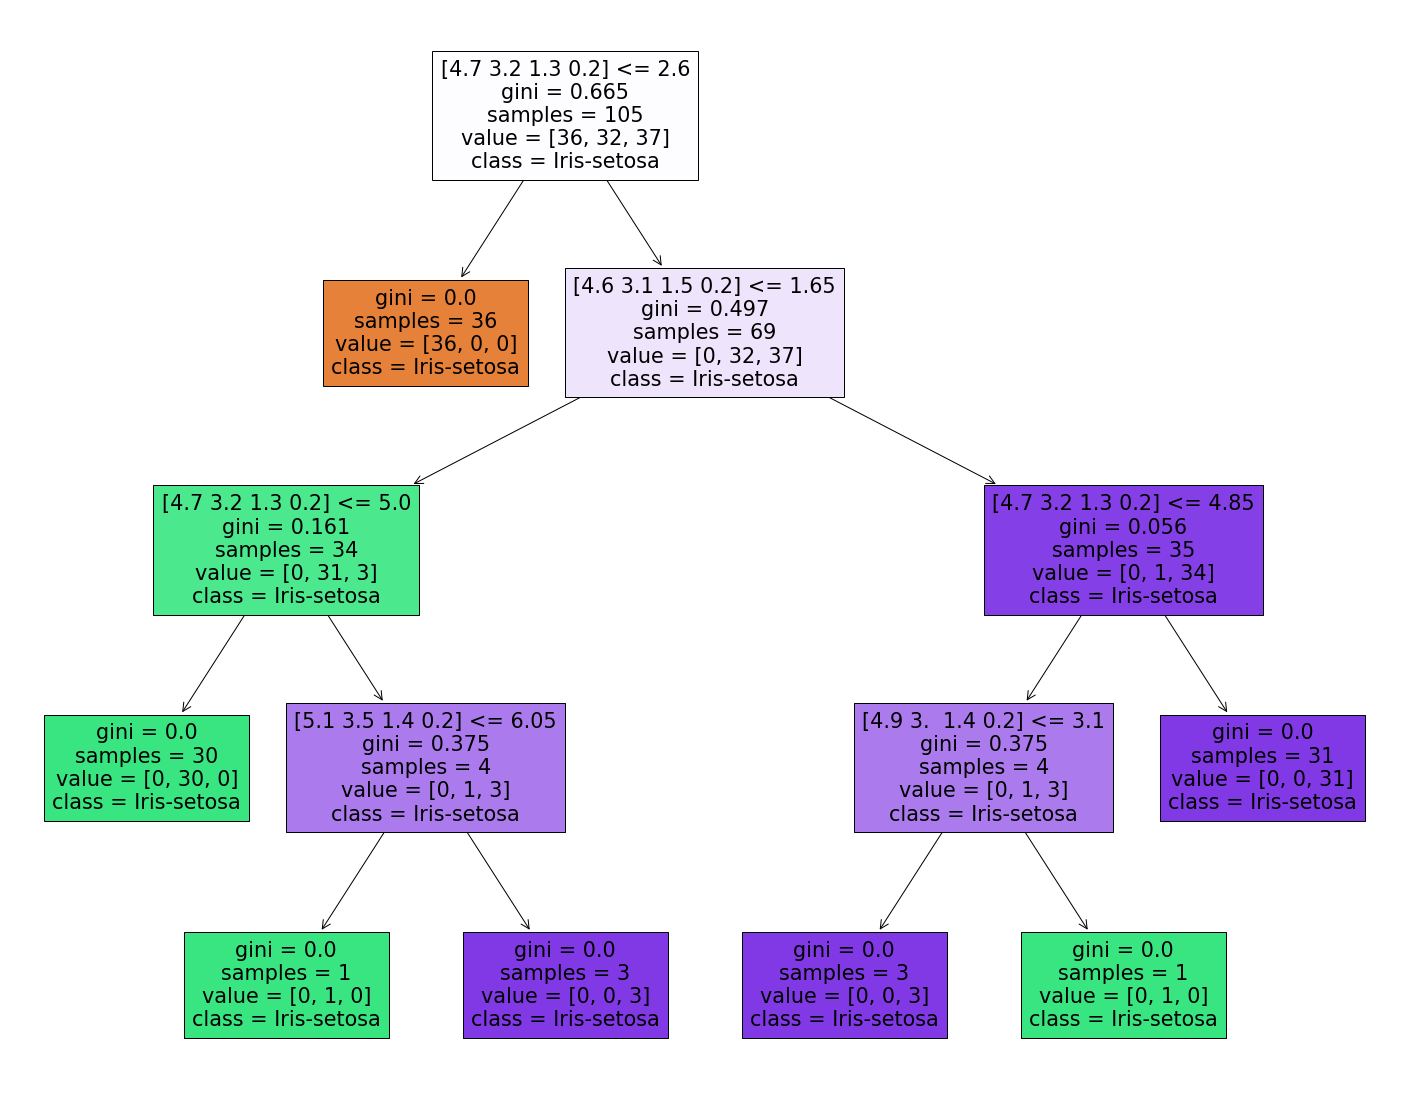

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X,  
                   class_names=Y,
                   filled=True)

Hence, in this project, we have created a Decision Tree classifier and visualize it graphically.

### **Thank You**